<a href="https://colab.research.google.com/github/jyothikumargoud/ML/blob/main/simplelinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
df =pd.read_csv('height-weight.csv')

In [99]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

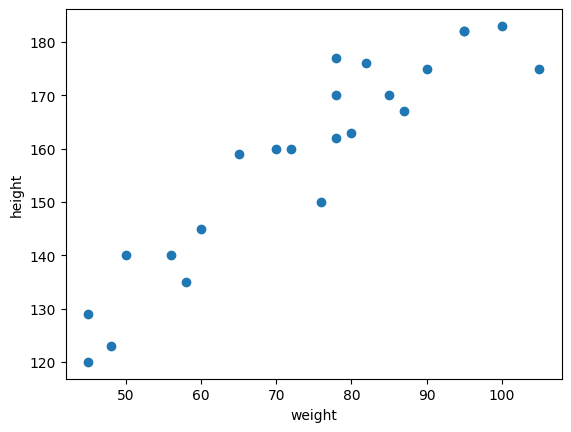

In [100]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('weight')
plt.ylabel('height')

In [101]:
#finding the co relation

In [102]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


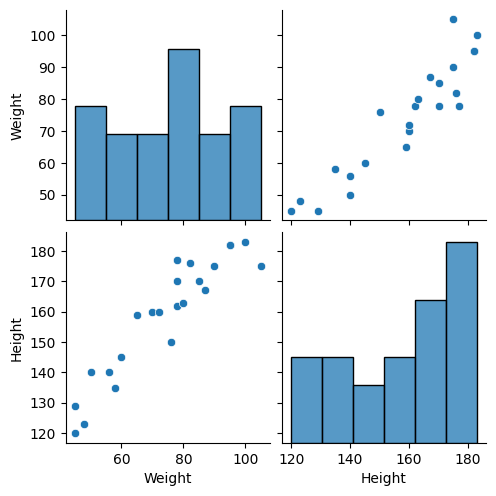

In [103]:
sns.pairplot(df)

In [104]:
# divide the features into dependent and independent

In [105]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [106]:
x = df[['Weight']]#independent feature needs to be in 2d array or datafraame
np.array(x)

array([[ 45],
       [ 58],
       [ 48],
       [ 60],
       [ 70],
       [ 78],
       [ 80],
       [ 90],
       [ 95],
       [ 78],
       [ 82],
       [ 95],
       [105],
       [100],
       [ 85],
       [ 78],
       [ 50],
       [ 65],
       [ 76],
       [ 87],
       [ 45],
       [ 56],
       [ 72]])

In [107]:
np.array(x.shape)#this is 2d dimensional

array([23,  1])

In [108]:
#dependenat feature needs to be in series or 1d array
y=df['Height']
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [109]:
#train test split /we will do this for overfitting and underfitting of model

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=25)

In [111]:
x_train.shape #shape needs to be in two d array

(17, 1)

In [112]:
x_train

,Weight
6,80
21,56
10,82
17,65
13,100
14,85
19,87
3,60
7,90
1,58


In [113]:
x_test

,Weight
2,48
9,78
20,45
16,50
11,95
0,45


In [114]:
y_train

6     163
21    140
10    176
17    159
13    183
14    170
19    167
3     145
7     175
1     135
5     162
22    160
8     182
18    150
12    175
15    177
4     160
Name: Height, dtype: int64

In [115]:
y_test

2     123
9     170
20    129
16    140
11    182
0     120
Name: Height, dtype: int64

In [116]:
#standadisation is applying z-score frormula
#here the input and output feature is diiff,the input feature has lagervalue so the optimization takes time so we will apply z-score fromula with mean =0,stdev = 1to every value in thr input feature ,so it optimizes fastly to golbal minima

In [117]:
from sklearn.preprocessing import StandardScaler


In [118]:
scaler = StandardScaler()#intisalizing to scaler

In [119]:
x_train = scaler.fit_transform(x_train)
x_train# this is my new trained data with mean =0,std dev = 1

array([[ 0.09755225],
       [-1.63293992],
       [ 0.24175994],
       [-0.98400535],
       [ 1.53962906],
       [ 0.45807146],
       [ 0.60227914],
       [-1.34452455],
       [ 0.81859066],
       [-1.48873223],
       [-0.04665543],
       [-0.47927847],
       [ 1.17910986],
       [-0.19086311],
       [ 1.90014827],
       [-0.04665543],
       [-0.62348615]])

In [120]:
x_test = scaler.transform(x_test)
x_test#this is my new test data with standadisation

array([[-2.20977064],
       [-0.04665543],
       [-2.42608216],
       [-2.06556296],
       [ 1.17910986],
       [-2.42608216]])

In [121]:
#applying regression algorithem

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
regression = LinearRegression(n_jobs=-1)
regression


LinearRegression(n_jobs=-1)

In [124]:
regression.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [125]:
print('the slope or the coeff  :',regression.coef_)#this indicates the unit movement in x axis leds to increase 12.184 units in x axis

the slope or the coeff  : [12.18480055]


In [126]:
print('the intercept of the :',regression.intercept_)# this is the point where it meats on y axis when  the intercept is zero

the intercept of the : 163.47058823529412


In [127]:
#plotting the trained data to see the line

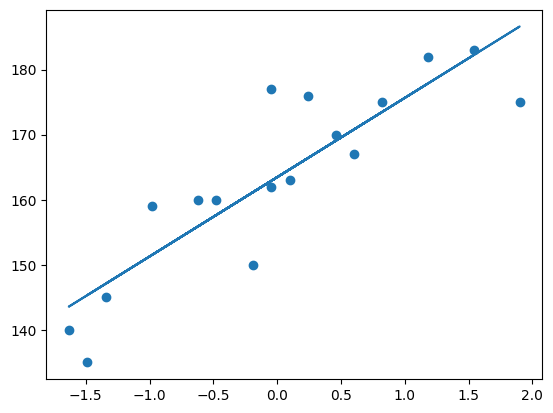

In [128]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train)) # to find the best fit line

In [129]:
#prediction

In [130]:
# pred height = intercept + coeff(x_test)
#y_pred_test = 163.47058823529412+12.18480055(x_test)

In [131]:
y_pred= regression.predict(x_test)

In [132]:
y_pred

array([136.54497374, 162.90210117, 133.90926099, 138.30211556,
       177.83780672, 133.90926099])

In [133]:
#performance metrics

In [134]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [135]:
print(mse)
print(rmse)
print(mae)

78.60358841916509
8.865866478758019
7.553578710033345


In [136]:
#r^2 = 1-ssr/sst

In [137]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.8603843900192449

In [138]:
#predection for new data

In [139]:
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([157.63067569])

In [140]:
#ols method of linear regression

In [141]:
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()
model


In [142]:
pred = model.predict(x_test)
print(pred)

[-26.9256145   -0.56848706 -29.56132724 -25.16847267  14.36721849
 -29.56132724]


In [143]:
print(model.summary())

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):             -0.057
Method:                 Least Squares   F-statistic:                            0.08874
Date:                Fri, 14 Jun 2024   Prob (F-statistic):                       0.770
Time:                        17:43:42   Log-Likelihood:                         -110.78
No. Observations:                  17   AIC:                                      223.6
Df Residuals:                      16   BIC:                                      224.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------